        Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
1455   42156    746.626       253.298892       213.247574      1.187816   
7495   36128    712.701       265.235047       174.075067      1.523682   
4203   68264   1027.426       408.548354       215.818718      1.893016   
4441   71468   1024.863       405.705030       226.234134      1.793297   
3431  150169   1496.077       562.823437       342.794875      1.641867   

      Eccentricity  ConvexArea  EquivDiameter    Extent  Solidity  roundness  \
1455      0.539663       42571     231.677980  0.754456  0.990252   0.950305   
7495      0.754496       36468     214.475169  0.716996  0.990677   0.893797   
4203      0.849084       69822     294.815916  0.733076  0.977686   0.812644   
4441      0.830088       72169     301.655240  0.786486  0.990287   0.855047   
3431      0.793122      151971     437.265490  0.779026  0.988142   0.843106   

      Compactness  ShapeFactor1  ShapeFactor2  ShapeFactor3  ShapeFa

C:\Users\letap\AppData\Local\Temp\ipykernel_20476\2239753279.py:24: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  drybean.replace(to_replace = "DERMASON", value = 7, inplace = True)


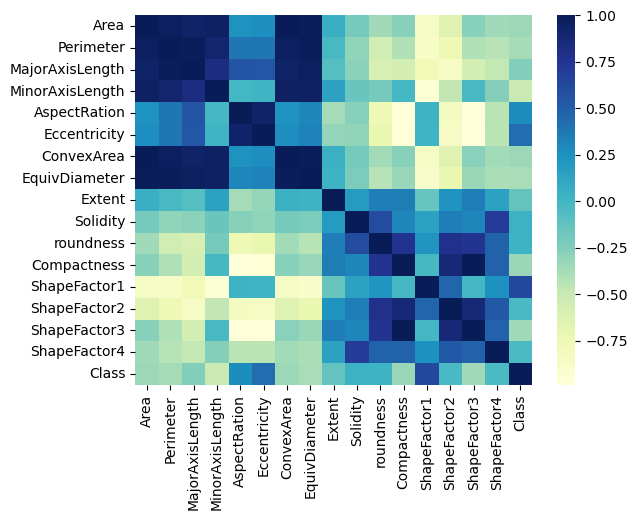

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
import pandas as pd
import seaborn as sb
import matplotlib as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
from sklearn.utils import shuffle

drybean = pd.read_csv("Dry_Bean_Dataset.csv")

drybean = shuffle(drybean)

print(drybean.head())

drybean.replace(to_replace = "SEKER", value = 1, inplace = True)
drybean.replace(to_replace = "BOMBAY", value = 3, inplace = True)
drybean.replace(to_replace = "BARBUNYA", value = 2, inplace = True)
drybean.replace(to_replace = "CALI", value = 4, inplace = True)
drybean.replace(to_replace = "HOROZ", value = 5, inplace = True)
drybean.replace(to_replace = "SIRA", value = 6, inplace = True)
drybean.replace(to_replace = "DERMASON", value = 7, inplace = True)


plot = sb.heatmap(drybean.corr(numeric_only=True), cmap="YlGnBu", annot=False)

In [13]:
features = drybean.filter(["AspectRation","Eccentricity","ShapeFactor1","ShapeFactor2","Solidity","Roundness"])
target = drybean.filter(["Class"])

scaler = StandardScaler()
features_standardized = scaler.fit_transform(features)

X_train, X_test, y_train, y_test = train_test_split(features_standardized, target, test_size = 0.2, random_state = 42)

svc = LinearSVC(C=1.0)

model = svc.fit(X_train, y_train.values.ravel())

In [15]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.8571428571428571


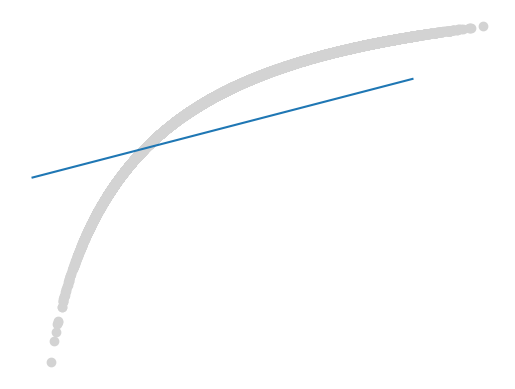

((-2.7967003587218033,
  3.7307075331578705,
  -6.1584479021753085,
  2.1212505756978386),
 None)

In [25]:
from matplotlib import pyplot as plt
import numpy as np
color = ["black" if c==0 else "lightgrey" for c in target]
plt.scatter(features_standardized[:,0], features_standardized[:,1], c=color)

w=svc.coef_[0]
a = -w[0]/w[1]
xx = np.linspace(-2.5,2.5)
yy = a*xx - (svc.intercept_[0]) / w[1]

plt.plot(xx,yy)
plt.axis("off"), plt.show()

In [33]:
new_observation = [[1.160455295, 0.507365875,0.006900329, 0.003145388, 0.989943672]]

svc.predict(new_observation)

array([1], dtype=int64)

In [37]:
from sklearn.svm import SVC

np.random.seed(0)

features = np.random.randn(200,2)

target_xor = np.logical_xor(features[:,0] > 0, features[:,1] > 0)
target = np.where(target_xor, 0, 1)

svc = SVC(kernel = "rbf", random_state = 0, gamma = 1, C=1)

model = svc.fit(features, target)

In [41]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

def plot_decision_regions(X,y,classifier):
    cmap = ListedColormap(("red","blue"))
    xx1, xx2 = np.meshgrid(np.arange(-3,3,0.02), np.arange(-3,3,0.02))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1,xx2,Z,alpha=0.1,cmap = cmap)

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y== cl, 0], y=X[y==cl, 1],
                    alpha = 0.8, c=cmap(idx),
                    marker = "+", label = cl)

In [43]:
svc_linear = SVC(kernel="linear",random_state = 0, C=1)
svc_linear.fit(features, target)

SVC(C=1, cache_size=200, class_weight = None, coef0 = 0.0, decision_function_shape = 'ovr',degree = 3, gamma='auto',kernel = 'linear',max_iter=-1,probability = False, random_state = 0, shrinking = True, tol = 0.001, verbose = False)

SVC(C=1, gamma='auto', kernel='linear', random_state=0)

C:\Users\letap\AppData\Local\Temp\ipykernel_20476\3571062514.py:12: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x=X[y== cl, 0], y=X[y==cl, 1],


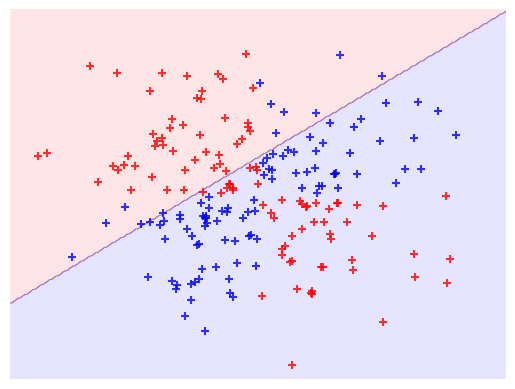

In [45]:
plot_decision_regions(features, target, classifier = svc_linear)
plt.axis("off"), plt.show();

In [47]:
svc = SVC(kernel = "rbf", random_state=0, gamma = 1, C=1)

model = svc.fit(features, target)

C:\Users\letap\AppData\Local\Temp\ipykernel_20476\3571062514.py:12: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x=X[y== cl, 0], y=X[y==cl, 1],


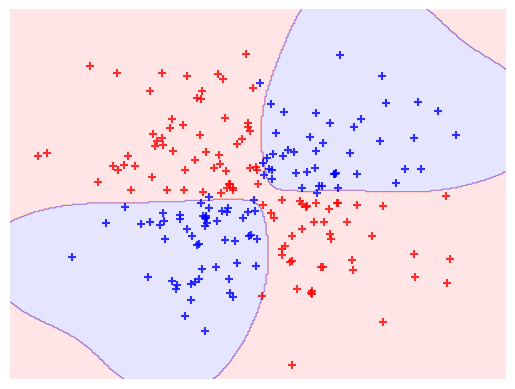

In [51]:
plot_decision_regions(features, target, classifier = svc)
plt.axis("off"), plt.show();

In [59]:
from sklearn.svm import SVC
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
import numpy as np

iris = datasets.load_iris()
features = iris.data
target = iris.target

scaler = StandardScaler()
features_standardized = scaler.fit_transform(features)

svc = SVC(kernel = "linear", probability = True, random_state =0)

model = svc.fit(features_standardized, target)

new_observation=[[.4,.4,.4,.4]]

model.predict_proba(new_observation)

array([[0.00541761, 0.97348825, 0.02109414]])

In [61]:
from sklearn.svm import SVC
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
import numpy as np

iris = datasets.load_iris()
features = iris.data
target = iris.target

scaler = StandardScaler()
features_standardized = scaler.fit_transform(features)

svc = SVC(kernel = "linear", random_state =0)

model = svc.fit(features_standardized, target)

model.support_vectors_

array([[-0.90068117,  0.55861082, -1.16971425, -0.92054774],
       [-1.62768839, -1.74335684, -1.39706395, -1.18381211],
       [ 1.2803405 ,  0.09821729,  0.64908342,  0.3957741 ],
       [ 0.79566902, -0.59237301,  0.47857113,  0.3957741 ],
       [ 0.55333328,  0.55861082,  0.53540856,  0.52740629],
       [-1.14301691, -1.51316008, -0.26031542, -0.26238682],
       [-0.29484182, -0.13197948,  0.42173371,  0.3957741 ],
       [ 0.4321654 , -1.97355361,  0.42173371,  0.3957741 ],
       [ 0.06866179,  0.32841405,  0.59224599,  0.79067065],
       [ 0.55333328, -1.28296331,  0.64908342,  0.3957741 ],
       [ 1.15917263, -0.59237301,  0.59224599,  0.26414192],
       [ 1.03800476, -0.13197948,  0.70592084,  0.65903847],
       [ 0.18982966, -0.36217625,  0.42173371,  0.3957741 ],
       [ 0.18982966, -0.82256978,  0.76275827,  0.52740629],
       [-0.53717756, -0.13197948,  0.42173371,  0.3957741 ],
       [ 0.55333328, -1.74335684,  0.36489628,  0.13250973],
       [-0.90068117, -1.

In [75]:
from sklearn.svm import SVC
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
import numpy as np

iris = datasets.load_iris()
features = iris.data[:100,:]
target = iris.target[:100]

features = features[40:,:]
target = target[40:]

target = np.where((target == 0), 0, 1)

scaler = StandardScaler()
features_standardized = scaler.fit_transform(features)

svc = SVC(kernel = "linear", class_weight="balanced", C=1.0, random_state = 0)

model = svc.fit(features_standardized, target)
